In [32]:
import numpy as np
import pandas as pd
import time
import sklearn.datasets 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [7]:
diabetes_dataset = pd.read_csv("diabetes.csv")

In [4]:
pd.read_csv?

In [8]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes_dataset.shape

(768, 9)

In [10]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
X= diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [15]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
standardized_data = scaler.transform(X)

In [23]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [25]:
X = standardized_data
Y= diabetes_dataset['Outcome']

In [26]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify = Y, random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [33]:
classifier = svm.SVC(kernel='linear')

In [34]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [36]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score of the training  data: ',training_data_accuracy  )

Accuracy score of the training  data:  0.7866449511400652


In [38]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [39]:
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7727272727272727


In [40]:
input_data=(4,110,92,0,0,37.6,0.191,30)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)
if(prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


C:\Users\91830\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
#transpose matrices
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [42]:
accuracies = dict()

In [43]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train.T, Y_train.T)
prediction = knn.predict(X_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test.T, Y_test.T)*100))

2 NN Score: 65.58%


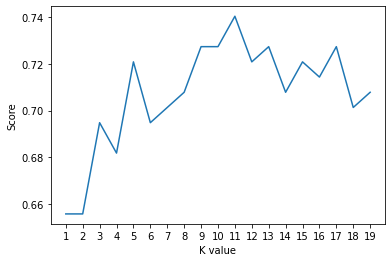

Maximum KNN Score is 74.03%


In [44]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train.T, Y_train.T)
    scoreList.append(knn2.score(X_test.T, Y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(random_state = 1)
svm.fit(X_train.T, Y_train.T)

acc = svm.score(X_test.T,Y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 72.73%


In [47]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': np.linspace(0.001, 100, 100),
              'gamma': np.linspace(0.001, 100, 100)}

cv = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=1000, cv=2, verbose=2)
cv.fit(X,Y)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits
[CV] END ........C=76.7679090909091, gamma=32.32390909090909; total time=   0.0s
[CV] END ........C=76.7679090909091, gamma=32.32390909090909; total time=   0.0s
[CV] END .......C=6.061545454545455, gamma=88.88900000000001; total time=   0.0s
[CV] END .......C=6.061545454545455, gamma=88.88900000000001; total time=   0.0s
[CV] END .......C=9.091818181818182, gamma=67.67709090909092; total time=   0.0s
[CV] END .......C=9.091818181818182, gamma=67.67709090909092; total time=   0.0s
[CV] END ......C=82.82845454545455, gamma=10.101909090909091; total time=   0.0s
[CV] END ......C=82.82845454545455, gamma=10.101909090909091; total time=   0.0s
[CV] END .......C=71.71745454545456, gamma=41.41472727272727; total time=   0.0s
[CV] END .......C=71.71745454545456, gamma=41.41472727272727; total time=   0.0s
[CV] END ......C=7.071636363636364, gamma=29.293636363636367; total time=   0.0s
[CV] END ......C=7.071636363636364, gamma=29

[CV] END .......C=39.39454545454546, gamma=74.74772727272727; total time=   0.0s
[CV] END .......C=39.39454545454546, gamma=74.74772727272727; total time=   0.0s
[CV] END ........C=78.78809090909093, gamma=98.9899090909091; total time=   0.0s
[CV] END ........C=78.78809090909093, gamma=98.9899090909091; total time=   0.0s
[CV] END ..................C=92.92936363636365, gamma=77.778; total time=   0.0s
[CV] END ..................C=92.92936363636365, gamma=77.778; total time=   0.0s
[CV] END ..................C=11.112, gamma=46.46518181818182; total time=   0.0s
[CV] END ..................C=11.112, gamma=46.46518181818182; total time=   0.0s
[CV] END .......C=58.58627272727273, gamma=67.67709090909092; total time=   0.0s
[CV] END .......C=58.58627272727273, gamma=67.67709090909092; total time=   0.0s
[CV] END ......C=68.68718181818183, gamma=22.223000000000003; total time=   0.0s
[CV] END ......C=68.68718181818183, gamma=22.223000000000003; total time=   0.0s
[CV] END .....C=62.626636363

[CV] END ........C=47.47527272727273, gamma=87.8789090909091; total time=   0.0s
[CV] END ......C=19.192727272727275, gamma=84.84863636363637; total time=   0.0s
[CV] END ......C=19.192727272727275, gamma=84.84863636363637; total time=   0.0s
[CV] END ......C=52.52572727272727, gamma=17.172545454545457; total time=   0.0s
[CV] END ......C=52.52572727272727, gamma=17.172545454545457; total time=   0.0s
[CV] END ...................C=0.001, gamma=60.60645454545455; total time=   0.0s
[CV] END ...................C=0.001, gamma=60.60645454545455; total time=   0.0s
[CV] END .......C=69.69727272727273, gamma=32.32390909090909; total time=   0.0s
[CV] END .......C=69.69727272727273, gamma=32.32390909090909; total time=   0.0s
[CV] END ..................C=8.081727272727273, gamma=44.445; total time=   0.0s
[CV] END ..................C=8.081727272727273, gamma=44.445; total time=   0.0s
[CV] END .......C=95.95963636363638, gamma=84.84863636363637; total time=   0.0s
[CV] END .......C=95.9596363

[CV] END ......C=16.162454545454548, gamma=52.52572727272727; total time=   0.0s
[CV] END .......C=36.36427272727273, gamma=34.34409090909091; total time=   0.0s
[CV] END .......C=36.36427272727273, gamma=34.34409090909091; total time=   0.0s
[CV] END .....C=18.182636363636366, gamma=10.101909090909091; total time=   0.0s
[CV] END .....C=18.182636363636366, gamma=10.101909090909091; total time=   0.0s
[CV] END .......C=61.61654545454545, gamma=24.24318181818182; total time=   0.0s
[CV] END .......C=61.61654545454545, gamma=24.24318181818182; total time=   0.0s
[CV] END .......C=93.93945454545455, gamma=39.39454545454546; total time=   0.0s
[CV] END .......C=93.93945454545455, gamma=39.39454545454546; total time=   0.0s
[CV] END ......C=63.63672727272728, gamma=20.202818181818184; total time=   0.0s
[CV] END ......C=63.63672727272728, gamma=20.202818181818184; total time=   0.0s
[CV] END ......C=16.162454545454548, gamma=54.54590909090909; total time=   0.0s
[CV] END ......C=16.16245454

[CV] END .......C=41.41472727272727, gamma=4.041363636363637; total time=   0.0s
[CV] END .......C=85.85872727272728, gamma=12.12209090909091; total time=   0.0s
[CV] END .......C=85.85872727272728, gamma=12.12209090909091; total time=   0.0s
[CV] END .......C=97.97981818181819, gamma=49.49545454545454; total time=   0.0s
[CV] END .......C=97.97981818181819, gamma=49.49545454545454; total time=   0.0s
[CV] END ......C=45.455090909090906, gamma=83.83854545454547; total time=   0.0s
[CV] END ......C=45.455090909090906, gamma=83.83854545454547; total time=   0.0s
[CV] END ......C=96.96972727272728, gamma=30.303727272727276; total time=   0.0s
[CV] END ......C=96.96972727272728, gamma=30.303727272727276; total time=   0.0s
[CV] END .......C=42.42481818181818, gamma=88.88900000000001; total time=   0.0s
[CV] END .......C=42.42481818181818, gamma=88.88900000000001; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=23.23309090909091; total time=   0.0s
[CV] END .......C=64.6468181

[CV] END ..................C=44.445, gamma=36.36427272727273; total time=   0.0s
[CV] END ..................C=44.445, gamma=36.36427272727273; total time=   0.0s
[CV] END ......C=17.172545454545457, gamma=83.83854545454547; total time=   0.0s
[CV] END ......C=17.172545454545457, gamma=83.83854545454547; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=83.83854545454547; total time=   0.0s
[CV] END .......C=64.64681818181819, gamma=83.83854545454547; total time=   0.0s
[CV] END .......C=27.27345454545455, gamma=1.011090909090909; total time=   0.0s
[CV] END .......C=27.27345454545455, gamma=1.011090909090909; total time=   0.0s
[CV] END .......C=72.72754545454546, gamma=1.011090909090909; total time=   0.0s
[CV] END .......C=72.72754545454546, gamma=1.011090909090909; total time=   0.0s
[CV] END ........C=8.081727272727273, gamma=86.8688181818182; total time=   0.0s
[CV] END ........C=8.081727272727273, gamma=86.8688181818182; total time=   0.0s
[CV] END .......C=83.8385454

[CV] END ......C=17.172545454545457, gamma=46.46518181818182; total time=   0.0s
[CV] END ......C=17.172545454545457, gamma=46.46518181818182; total time=   0.0s
[CV] END .......C=67.67709090909092, gamma=37.37436363636363; total time=   0.0s
[CV] END .......C=67.67709090909092, gamma=37.37436363636363; total time=   0.0s
[CV] END ......C=78.78809090909093, gamma=55.556000000000004; total time=   0.0s
[CV] END ......C=78.78809090909093, gamma=55.556000000000004; total time=   0.0s
[CV] END ..................C=52.52572727272727, gamma=11.112; total time=   0.0s
[CV] END ..................C=52.52572727272727, gamma=11.112; total time=   0.0s
[CV] END .......C=85.85872727272728, gamma=32.32390909090909; total time=   0.0s
[CV] END .......C=85.85872727272728, gamma=32.32390909090909; total time=   0.0s
[CV] END ......C=61.61654545454545, gamma=22.223000000000003; total time=   0.0s
[CV] END ......C=61.61654545454545, gamma=22.223000000000003; total time=   0.0s
[CV] END .......C=36.3642727

[CV] END ......C=40.404636363636364, gamma=54.54590909090909; total time=   0.0s
[CV] END ......C=40.404636363636364, gamma=54.54590909090909; total time=   0.0s
[CV] END .......C=41.41472727272727, gamma=88.88900000000001; total time=   0.0s
[CV] END .......C=41.41472727272727, gamma=88.88900000000001; total time=   0.0s
[CV] END .......C=81.81836363636364, gamma=71.71745454545456; total time=   0.0s
[CV] END .......C=81.81836363636364, gamma=71.71745454545456; total time=   0.0s
[CV] END .......C=37.37436363636363, gamma=82.82845454545455; total time=   0.0s
[CV] END .......C=37.37436363636363, gamma=82.82845454545455; total time=   0.0s
[CV] END ..................C=95.95963636363638, gamma=11.112; total time=   0.0s
[CV] END ..................C=95.95963636363638, gamma=11.112; total time=   0.0s
[CV] END .......C=72.72754545454546, gamma=80.80827272727274; total time=   0.0s
[CV] END .......C=72.72754545454546, gamma=80.80827272727274; total time=   0.0s
[CV] END .......C=86.8688181

[CV] END .......C=67.67709090909092, gamma=42.42481818181818; total time=   0.0s
[CV] END .....C=40.404636363636364, gamma=3.0312727272727273; total time=   0.0s
[CV] END .....C=40.404636363636364, gamma=3.0312727272727273; total time=   0.0s
[CV] END .......C=56.56609090909091, gamma=68.68718181818183; total time=   0.0s
[CV] END .......C=56.56609090909091, gamma=68.68718181818183; total time=   0.0s
[CV] END ..................C=11.112, gamma=68.68718181818183; total time=   0.0s
[CV] END ..................C=11.112, gamma=68.68718181818183; total time=   0.0s
[CV] END .......C=56.56609090909091, gamma=64.64681818181819; total time=   0.0s
[CV] END .......C=56.56609090909091, gamma=64.64681818181819; total time=   0.0s
[CV] END .......C=39.39454545454546, gamma=71.71745454545456; total time=   0.0s
[CV] END .......C=39.39454545454546, gamma=71.71745454545456; total time=   0.0s
[CV] END .......C=72.72754545454546, gamma=5.051454545454546; total time=   0.0s
[CV] END .......C=72.7275454

[CV] END ......C=31.313818181818185, gamma=94.94954545454547; total time=   0.0s
[CV] END ......C=31.313818181818185, gamma=94.94954545454547; total time=   0.0s
[CV] END ......C=47.47527272727273, gamma=30.303727272727276; total time=   0.0s
[CV] END ......C=47.47527272727273, gamma=30.303727272727276; total time=   0.0s
[CV] END .......C=36.36427272727273, gamma=26.26336363636364; total time=   0.0s
[CV] END .......C=36.36427272727273, gamma=26.26336363636364; total time=   0.0s
[CV] END .......C=74.74772727272727, gamma=89.89909090909092; total time=   0.0s
[CV] END .......C=74.74772727272727, gamma=89.89909090909092; total time=   0.0s
[CV] END .......C=90.90918181818182, gamma=93.93945454545455; total time=   0.0s
[CV] END .......C=90.90918181818182, gamma=93.93945454545455; total time=   0.0s
[CV] END ......C=90.90918181818182, gamma=62.626636363636365; total time=   0.0s
[CV] END ......C=90.90918181818182, gamma=62.626636363636365; total time=   0.0s
[CV] END ........C=87.878909

[CV] END ...................C=77.778, gamma=98.9899090909091; total time=   0.0s
[CV] END ...................C=77.778, gamma=98.9899090909091; total time=   0.0s
[CV] END ......C=31.313818181818185, gamma=81.81836363636364; total time=   0.0s
[CV] END ......C=31.313818181818185, gamma=81.81836363636364; total time=   0.0s
[CV] END ........C=32.32390909090909, gamma=75.7578181818182; total time=   0.0s
[CV] END ........C=32.32390909090909, gamma=75.7578181818182; total time=   0.0s
[CV] END ........C=65.6569090909091, gamma=78.78809090909093; total time=   0.0s
[CV] END ........C=65.6569090909091, gamma=78.78809090909093; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=67.67709090909092; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=67.67709090909092; total time=   0.0s
[CV] END ......C=7.071636363636364, gamma=30.303727272727276; total time=   0.0s
[CV] END ......C=7.071636363636364, gamma=30.303727272727276; total time=   0.0s
[CV] END ......C=71.71745454

[CV] END ......C=25.25327272727273, gamma=10.101909090909091; total time=   0.0s
[CV] END .......C=83.83854545454547, gamma=5.051454545454546; total time=   0.0s
[CV] END .......C=83.83854545454547, gamma=5.051454545454546; total time=   0.0s
[CV] END .......C=32.32390909090909, gamma=92.92936363636365; total time=   0.0s
[CV] END .......C=32.32390909090909, gamma=92.92936363636365; total time=   0.0s
[CV] END ......C=43.434909090909095, gamma=5.051454545454546; total time=   0.0s
[CV] END ......C=43.434909090909095, gamma=5.051454545454546; total time=   0.0s
[CV] END .......C=47.47527272727273, gamma=74.74772727272727; total time=   0.0s
[CV] END .......C=47.47527272727273, gamma=74.74772727272727; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=49.49545454545454; total time=   0.0s
[CV] END .......C=63.63672727272728, gamma=49.49545454545454; total time=   0.0s
[CV] END ........C=76.7679090909091, gamma=7.071636363636364; total time=   0.0s
[CV] END ........C=76.767909

[CV] END ......C=17.172545454545457, gamma=9.091818181818182; total time=   0.0s
[CV] END .......C=74.74772727272727, gamma=4.041363636363637; total time=   0.0s
[CV] END .......C=74.74772727272727, gamma=4.041363636363637; total time=   0.0s
[CV] END .......C=96.96972727272728, gamma=6.061545454545455; total time=   0.0s
[CV] END .......C=96.96972727272728, gamma=6.061545454545455; total time=   0.0s
[CV] END ........C=61.61654545454545, gamma=98.9899090909091; total time=   0.0s
[CV] END ........C=61.61654545454545, gamma=98.9899090909091; total time=   0.0s
[CV] END ......C=14.142272727272728, gamma=53.53581818181818; total time=   0.0s
[CV] END ......C=14.142272727272728, gamma=53.53581818181818; total time=   0.0s
[CV] END .......C=1.011090909090909, gamma=48.48536363636364; total time=   0.0s
[CV] END .......C=1.011090909090909, gamma=48.48536363636364; total time=   0.0s
[CV] END .......C=52.52572727272727, gamma=85.85872727272728; total time=   0.0s
[CV] END .......C=52.5257272

[CV] END .......C=81.81836363636364, gamma=78.78809090909093; total time=   0.0s
[CV] END .......C=81.81836363636364, gamma=78.78809090909093; total time=   0.0s
[CV] END ......C=80.80827272727274, gamma=29.293636363636367; total time=   0.0s
[CV] END ......C=80.80827272727274, gamma=29.293636363636367; total time=   0.0s
[CV] END .......C=34.34409090909091, gamma=95.95963636363638; total time=   0.0s
[CV] END .......C=34.34409090909091, gamma=95.95963636363638; total time=   0.0s
[CV] END .......C=84.84863636363637, gamma=95.95963636363638; total time=   0.0s
[CV] END .......C=84.84863636363637, gamma=95.95963636363638; total time=   0.0s
[CV] END .......C=41.41472727272727, gamma=68.68718181818183; total time=   0.0s
[CV] END .......C=41.41472727272727, gamma=68.68718181818183; total time=   0.0s
[CV] END .......C=69.69727272727273, gamma=80.80827272727274; total time=   0.0s
[CV] END .......C=69.69727272727273, gamma=80.80827272727274; total time=   0.0s
[CV] END .......C=83.8385454

[CV] END ..................C=100.0, gamma=43.434909090909095; total time=   0.0s
[CV] END ..................C=100.0, gamma=43.434909090909095; total time=   0.0s
[CV] END ..................C=95.95963636363638, gamma=77.778; total time=   0.0s
[CV] END ..................C=95.95963636363638, gamma=77.778; total time=   0.0s
[CV] END ......C=53.53581818181818, gamma=18.182636363636366; total time=   0.0s
[CV] END ......C=53.53581818181818, gamma=18.182636363636366; total time=   0.0s
[CV] END .......C=74.74772727272727, gamma=39.39454545454546; total time=   0.0s
[CV] END .......C=74.74772727272727, gamma=39.39454545454546; total time=   0.0s
[CV] END .......C=97.97981818181819, gamma=94.94954545454547; total time=   0.0s
[CV] END .......C=97.97981818181819, gamma=94.94954545454547; total time=   0.0s
[CV] END ..................C=3.0312727272727273, gamma=100.0; total time=   0.0s
[CV] END ..................C=3.0312727272727273, gamma=100.0; total time=   0.0s
[CV] END .......C=53.5358181

[CV] END .......C=67.67709090909092, gamma=95.95963636363638; total time=   0.0s
[CV] END ......C=47.47527272727273, gamma=18.182636363636366; total time=   0.0s
[CV] END ......C=47.47527272727273, gamma=18.182636363636366; total time=   0.0s
[CV] END ......C=81.81836363636364, gamma=17.172545454545457; total time=   0.0s
[CV] END ......C=81.81836363636364, gamma=17.172545454545457; total time=   0.0s
[CV] END ........C=76.7679090909091, gamma=49.49545454545454; total time=   0.0s
[CV] END ........C=76.7679090909091, gamma=49.49545454545454; total time=   0.0s
[CV] END ......C=93.93945454545455, gamma=43.434909090909095; total time=   0.0s
[CV] END ......C=93.93945454545455, gamma=43.434909090909095; total time=   0.0s
[CV] END .......C=51.51563636363637, gamma=56.56609090909091; total time=   0.0s
[CV] END .......C=51.51563636363637, gamma=56.56609090909091; total time=   0.0s
[CV] END ..................C=93.93945454545455, gamma=11.112; total time=   0.0s
[CV] END ..................C

[CV] END ......C=49.49545454545454, gamma=21.212909090909093; total time=   0.0s
[CV] END ......C=49.49545454545454, gamma=30.303727272727276; total time=   0.0s
[CV] END ......C=49.49545454545454, gamma=30.303727272727276; total time=   0.0s
[CV] END ......C=13.132181818181818, gamma=91.91927272727274; total time=   0.0s
[CV] END ......C=13.132181818181818, gamma=91.91927272727274; total time=   0.0s
[CV] END ......C=21.212909090909093, gamma=42.42481818181818; total time=   0.0s
[CV] END ......C=21.212909090909093, gamma=42.42481818181818; total time=   0.0s
[CV] END ........C=98.9899090909091, gamma=4.041363636363637; total time=   0.0s
[CV] END ........C=98.9899090909091, gamma=4.041363636363637; total time=   0.0s
[CV] END .......C=76.7679090909091, gamma=10.101909090909091; total time=   0.0s
[CV] END .......C=76.7679090909091, gamma=10.101909090909091; total time=   0.0s
[CV] END .......C=67.67709090909092, gamma=2.021181818181818; total time=   0.0s
[CV] END .......C=67.6770909

[CV] END .......C=85.85872727272728, gamma=93.93945454545455; total time=   0.0s
[CV] END .......C=36.36427272727273, gamma=60.60645454545455; total time=   0.0s
[CV] END .......C=36.36427272727273, gamma=60.60645454545455; total time=   0.0s
[CV] END .......C=79.79818181818183, gamma=67.67709090909092; total time=   0.0s
[CV] END .......C=79.79818181818183, gamma=67.67709090909092; total time=   0.0s
[CV] END .......C=12.12209090909091, gamma=1.011090909090909; total time=   0.0s
[CV] END .......C=12.12209090909091, gamma=1.011090909090909; total time=   0.0s
[CV] END ..................C=22.223000000000003, gamma=0.001; total time=   0.0s
[CV] END ..................C=22.223000000000003, gamma=0.001; total time=   0.0s
[CV] END ...................C=64.64681818181819, gamma=100.0; total time=   0.0s
[CV] END ...................C=64.64681818181819, gamma=100.0; total time=   0.0s
[CV] END .......C=9.091818181818182, gamma=12.12209090909091; total time=   0.0s
[CV] END .......C=9.09181818

[CV] END ......C=39.39454545454546, gamma=30.303727272727276; total time=   0.0s
[CV] END .......C=80.80827272727274, gamma=51.51563636363637; total time=   0.0s
[CV] END .......C=80.80827272727274, gamma=51.51563636363637; total time=   0.0s
[CV] END .......C=34.34409090909091, gamma=48.48536363636364; total time=   0.0s
[CV] END .......C=34.34409090909091, gamma=48.48536363636364; total time=   0.0s
[CV] END .......C=75.7578181818182, gamma=20.202818181818184; total time=   0.0s
[CV] END .......C=75.7578181818182, gamma=20.202818181818184; total time=   0.0s
[CV] END .......C=53.53581818181818, gamma=59.59636363636364; total time=   0.0s
[CV] END .......C=53.53581818181818, gamma=59.59636363636364; total time=   0.0s
[CV] END .....C=31.313818181818185, gamma=18.182636363636366; total time=   0.0s
[CV] END .....C=31.313818181818185, gamma=18.182636363636366; total time=   0.0s
[CV] END .......C=5.051454545454546, gamma=59.59636363636364; total time=   0.0s
[CV] END .......C=5.05145454

RandomizedSearchCV(cv=2, estimator=SVC(random_state=1), n_iter=1000,
                   param_distributions={'C': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+...
       7.67679091e+01, 7.77780000e+01, 7.87880909e+01, 7.97981818e+01,
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
                   verbose=2)

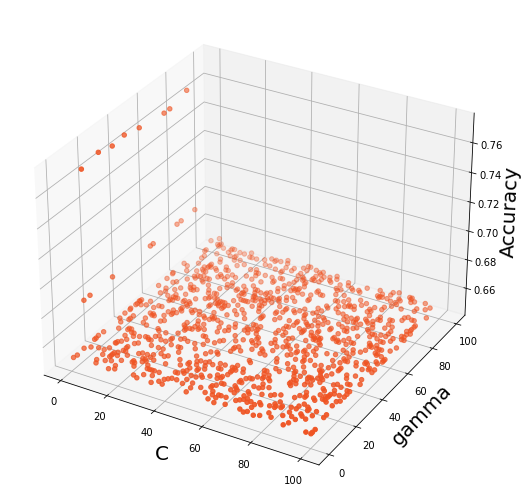

In [48]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(cv.cv_results_['param_gamma'], cv.cv_results_['param_C'], cv.cv_results_['mean_test_score'], color='#ef5423')
ax.set_xlabel('C', fontsize=20)
ax.set_ylabel('gamma', fontsize=20)
ax.set_zlabel('Accuracy', fontsize=20)
plt.show()

In [49]:
cv.best_params_

{'gamma': 0.001, 'C': 22.223000000000003}

In [50]:
svm = SVC(gamma=cv.best_params_['gamma'], C=cv.best_params_['C'])
start_time = time.time()
svm.fit(X_train.T, Y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = svm.score(X_test.T,Y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Time consumed to fit model:  00:00:00
Test Accuracy of SVM Algorithm: 75.97%


In [51]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.T, Y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = nb.score(X_test.T,Y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Time consumed to fit model:  00:00:00
Accuracy of Naive Bayes: 77.27%


In [52]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
start_time = time.time()
dtc.fit(X_train.T, Y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = dtc.score(X_test.T, Y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Time consumed to fit model:  00:00:00
Decision Tree Test Accuracy 70.13%


In [53]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
start_time = time.time()
rf.fit(X_train.T, Y_train.T)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
acc = rf.score(X_test.T,Y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Time consumed to fit model:  00:00:01
Random Forest Algorithm Accuracy Score : 75.32%


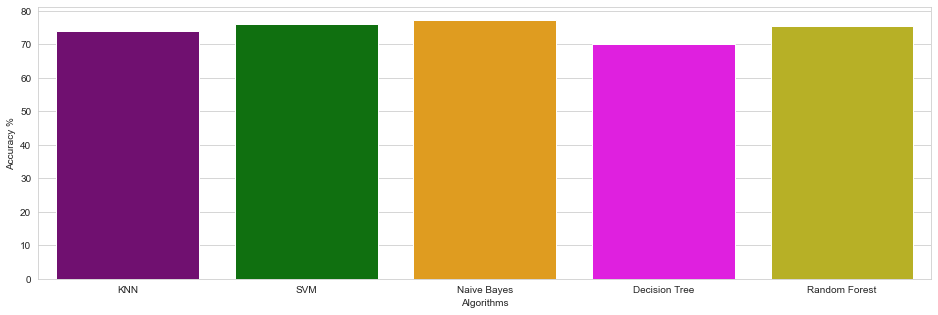

In [54]:
# Compairning Model
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [55]:
## Confusion Matrix

In [56]:
# Predicted values
knn3 = KNeighborsClassifier(n_neighbors = 3)

knn3.fit(X_train.T, Y_train.T)

y_head_knn = knn3.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)
y_head_dt = dtc.predict(X_test.T)
y_head_rf = rf.predict(X_test.T)

In [57]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(Y_test,y_head_knn)
cm_svm = confusion_matrix(Y_test,y_head_svm)
cm_nb = confusion_matrix(Y_test,y_head_nb)
cm_dt = confusion_matrix(Y_test,y_head_dt)
cm_rf = confusion_matrix(Y_test,y_head_rf)

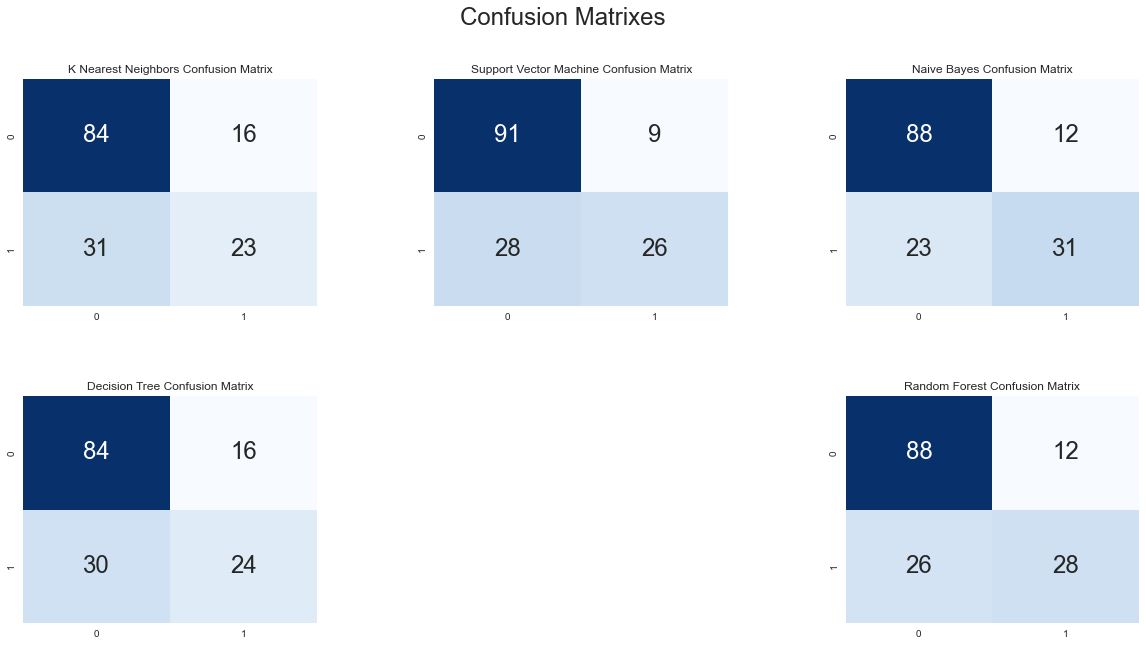

In [58]:
plt.figure(figsize=(20,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()